Importing Necessary Libraries

# CREDIT CARD FRAUD DETECTION:
This fraud detection machine learning project aims to develop a robust model for identifying fraudulent transactions within credit card data. Credit card fraud is a significant challenge in the financial industry, leading to substantial financial losses annually. By leveraging advanced machine learning techniques, this project seeks to create a reliable system capable of distinguishing between legitimate and fraudulent transactions.The dataset utilized in this project is a highly imbalanced credit card transaction dataset, commonly used in fraud detection research. The dataset consists of various anonymized transaction features obtained through Principal Component Analysis (PCA), the transaction amount, and a class label indicating whether a transaction is fraudulent.**bold text**

# Dataset Description:

Column Descriptions

**Time**:
The number of seconds elapsed between this transaction and the first transaction in the dataset. This helps identify patterns over time, such as fraud occurring more frequently at certain times.

**V1, V2, ..., V28:**

 These are the principal components obtained using PCA (Principal Component Analysis), which are used to anonymize the sensitive features. These columns represent the transformed features from the original dataset, capturing the variance in the data.

**Amount**:

  The transaction amount. This feature is useful for identifying fraudulent transactions, as fraudsters often attempt transactions with unusually high or low amounts.

 **Class**:

   The response variable, where 1 indicates a fraudulent transaction and 0 indicates a legitimate transaction. This is the target variable used for training the model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset to a Pandas DataFrame
dataset= pd.read_csv('/content/drive/MyDrive/infosys datsets/creditcarddata.csv')

Data Preprocessing

In [ ]:
# first 5 rows of the dataset
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#number of rows and columns
dataset.shape

(284807, 31)

In [ ]:
# checking the number of missing values in each column
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
dataset['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction(legit)
1 --> fraudulent transaction

In [ ]:
dataset.shape

(284807, 31)

In [ ]:
#Check duplicate transactions
dataset.duplicated().any()

True

In [ ]:
dataset = dataset.drop_duplicates()
#Removed duplicate data
dataset.shape

(283726, 31)

In [ ]:
#totalnduplicate elements
284807- 283726

1081

In [ ]:
pd.value_counts(dataset['Class'])

Class
0    283253
1       473
Name: count, dtype: int64

In [ ]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


 Handling Imbalanced Dataset

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions = 473

In [ ]:
legit_sample = legit.sample(n=473)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
124387,77271.0,1.473344,-0.534567,-0.246522,-0.838716,-0.075968,0.386795,-0.519726,-0.022002,-0.524984,...,-0.008131,0.177874,-0.249817,-1.266580,0.826448,-0.030614,0.026428,-0.008909,2.99,0
69695,53541.0,1.445154,-0.452326,-0.349095,-0.844192,-0.200927,-0.056980,-0.288540,-0.127307,-1.115400,...,-0.463723,-0.713765,-0.173005,-0.766086,0.589620,1.143994,-0.068163,-0.022106,7.00,0
189462,128413.0,0.028089,0.670246,0.812059,-0.381980,0.102757,-1.675610,1.114613,-0.424045,0.189718,...,-0.259349,-0.461594,0.162178,0.898608,-0.664050,0.057718,0.076659,-0.117276,1.98,0
123164,76833.0,0.828946,0.566211,0.103536,0.903961,0.797568,0.249682,0.706909,-0.421281,0.354265,...,-0.107907,0.272353,0.141930,-0.972443,-0.732798,-0.507418,-0.194513,-0.517600,20.00,0
124434,77284.0,-0.603351,0.345987,0.740727,-0.866259,-0.890596,-0.384063,0.423415,0.249610,-2.019808,...,-0.001685,-0.428304,0.533179,0.048539,-0.708868,-0.624419,0.004727,0.108182,140.00,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

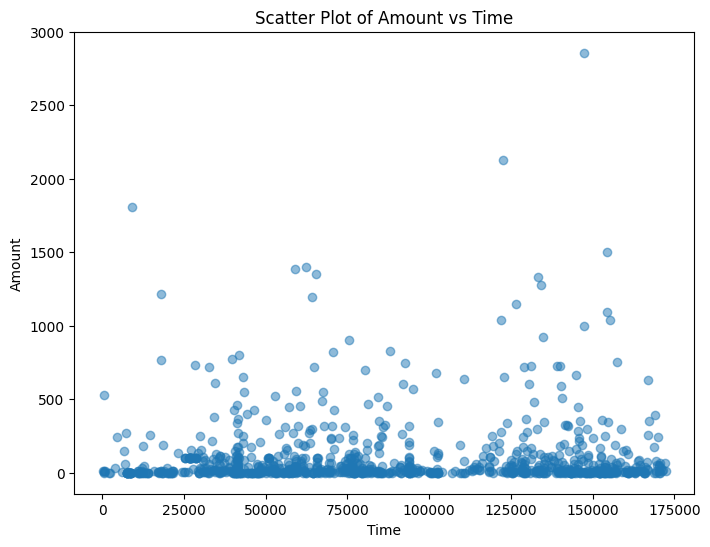

In [ ]:
# Scatter plot between Amount and Time
plt.figure(figsize=(8, 6))
plt.scatter(new_dataset['Time'], new_dataset['Amount'], alpha=0.5)
plt.title('Scatter Plot of Amount vs Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

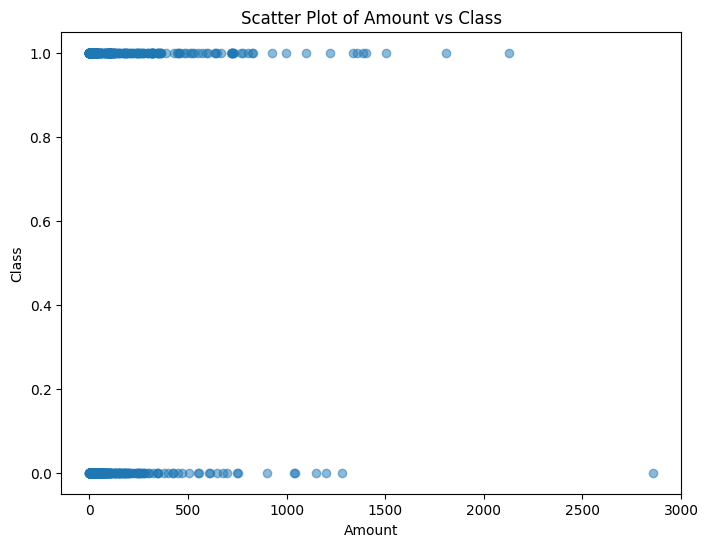

In [ ]:
# Scatter plot between Amount and Class
plt.figure(figsize=(8, 6))
plt.scatter(new_dataset['Amount'], new_dataset['Class'], alpha=0.5)
plt.title('Scatter Plot of Amount vs Class')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

Splitting the data into Features & Targets

In [ ]:
# Putting feature variables into X
X = new_dataset.drop(columns='Class', axis=1)
# Putting target variable to y
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
124387   77271.0  1.473344 -0.534567 -0.246522 -0.838716 -0.075968  0.386795   
69695    53541.0  1.445154 -0.452326 -0.349095 -0.844192 -0.200927 -0.056980   
189462  128413.0  0.028089  0.670246  0.812059 -0.381980  0.102757 -1.675610   
123164   76833.0  0.828946  0.566211  0.103536  0.903961  0.797568  0.249682   
124434   77284.0 -0.603351  0.345987  0.740727 -0.866259 -0.890596 -0.384063   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

124387    0
69695     0
189462    0
123164    0
124434    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


#Feature selection using Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:

clf = RandomForestClassifier()
clf.fit(X, Y)
importances = clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_selected = model.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Split the data into Training data & Testing Data

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (756, 30) (190, 30)


Model Training

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [ ]:
# accuracy on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.921957671957672


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9263157894736842


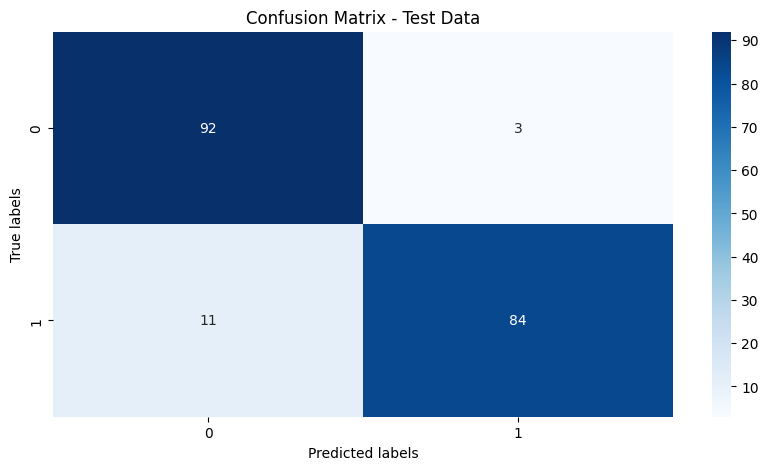

In [ ]:
# Plot confusion matrix as heatmap for test data
from sklearn.metrics import confusion_matrix

# Predict the labels for the test data
y_pred_test = model.predict(X_test)

# Calculate the confusion matrix
conf_matrix_test = confusion_matrix(Y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_test, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
from sklearn.metrics import precision_score

# Calculate precision on training data
training_data_precision = precision_score(Y_train, X_train_prediction)

print('Precision on Training data : ', training_data_precision)

# Calculate precision on test data
test_data_precision = precision_score(Y_test, X_test_prediction)

print('Precision score on Test Data : ', test_data_precision)

Precision on Training data :  0.9467787114845938
Precision score on Test Data :  0.9655172413793104


In [ ]:
from sklearn.metrics import classification_report

#classification report for training data
print("Classification Report for Training Data:")
print(classification_report(Y_train, X_train_prediction))

#classification report for test data
print("Classification Report for Test Data:")
print(classification_report(Y_test, X_test_prediction))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       378
           1       0.95      0.89      0.92       378

    accuracy                           0.92       756
   macro avg       0.92      0.92      0.92       756
weighted avg       0.92      0.92      0.92       756

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        95
           1       0.97      0.88      0.92        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



RandomForest Model

In [ ]:
# Train  random forest model

from sklearn.ensemble import RandomForestClassifier
# Initialize random forest model
random_forest_model = RandomForestClassifier()


In [ ]:
# Accuracy on training data
random_forest_model.fit(X_train, Y_train)
# Predictions on training data
random_forest_train_predictions = random_forest_model.predict(X_train)

from sklearn.metrics import accuracy_score
random_forest_training_accuracy = accuracy_score(random_forest_train_predictions, Y_train)
print('Random Forest Accuracy on Training data : ', random_forest_training_accuracy)
# Predictions on test data
random_forest_test_predictions = random_forest_model.predict(X_test)
# Accuracy on test data
random_forest_test_accuracy = accuracy_score(random_forest_test_predictions, Y_test)
print('Random Forest Accuracy on Test Data : ', random_forest_test_accuracy)

Random Forest Accuracy on Training data :  1.0
Random Forest Accuracy on Test Data :  0.9421052631578948


Precision score

In [ ]:
# Calculate precision on training data
training_data_precision = precision_score(Y_train, X_train_prediction)
print('Precision on Training data : ', training_data_precision)

# Calculate precision on test data
test_data_precision = precision_score(Y_test, X_test_prediction)
print('Precision score on Test Data : ', test_data_precision)

Precision on Training data :  0.9467787114845938
Precision score on Test Data :  0.9655172413793104


Classification report for RandomForest Model

In [ ]:
# Classification report for Random Forest on training data
print("Classification Report for Random Forest on Training Data:")
print(classification_report(Y_train, random_forest_train_predictions))

Classification Report for Random Forest on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       378

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756



In [ ]:
from sklearn.metrics import precision_score, classification_report
# Precision score on test data for Random Forest
random_forest_test_precision = precision_score(Y_test, random_forest_test_predictions)
print('Random Forest Precision score on Test Data : ', random_forest_test_precision)

# Classification report for Random Forest on test data
print("Classification Report for Random Forest on Test Data:")
print(classification_report(Y_test, random_forest_test_predictions))

Random Forest Precision score on Test Data :  0.9772727272727273
Classification Report for Random Forest on Test Data:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        95
           1       0.98      0.91      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



Decision Tree Model

In [ ]:
#Initialise model
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
decision_tree_train_predictions = decision_tree_model.predict(X_train)
decision_tree_training_accuracy = accuracy_score(decision_tree_train_predictions, Y_train)
# Accuracy on training data
print('Decision Tree Accuracy on Training data : ', decision_tree_training_accuracy)

decision_tree_test_predictions = decision_tree_model.predict(X_test)
# Accuracy on test data
decision_tree_test_accuracy = accuracy_score(decision_tree_test_predictions, Y_test)
print('Decision Tree Accuracy on Test Data : ', decision_tree_test_accuracy)

Decision Tree Accuracy on Training data :  1.0
Decision Tree Accuracy on Test Data :  0.9105263157894737


In [ ]:
# Precision score on test data for decision tree
decision_tree_test_precision = precision_score(Y_test, decision_tree_test_predictions)
print('Decision Tree Precision score on Test Data : ', decision_tree_test_precision)

# Precision score on training data for decision tree
decision_tree_train_precision = precision_score(Y_train, decision_tree_train_predictions)
print('Decision Tree Precision score on Training Data : ', decision_tree_train_precision)


Decision Tree Precision score on Test Data :  0.89
Decision Tree Precision score on Training Data :  1.0


In [ ]:
# Classification report for Decision Tree on training data
print("Classification Report for Decision Tree on Training Data:")
print(classification_report(Y_train, decision_tree_train_predictions))

Classification Report for Decision Tree on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       378

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756



In [ ]:
# Classification report for Decision Tree on test data
print("Classification Report for Decision Tree on Test Data:")
print(classification_report(Y_test, decision_tree_test_predictions))


Classification Report for Decision Tree on Test Data:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91        95
           1       0.89      0.94      0.91        95

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190

